<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy import signal, fftpack

In [12]:
from google.colab import files
uploaded = files.upload()

Saving falhas_intermitentes_e_impulsos.wav to falhas_intermitentes_e_impulsos.wav


In [14]:
[fs_audio,audio]=wavfile.read('falhas_intermitentes_e_impulsos.wav')
audio = audio.astype(np.float32)

In [15]:
T = 1/fs_audio
time_audio = np.linspace(0,10,audio.shape[0])
print('A frequência de amostragem é: {}Hz'.format(fs_audio))

A frequência de amostragem é: 44100Hz


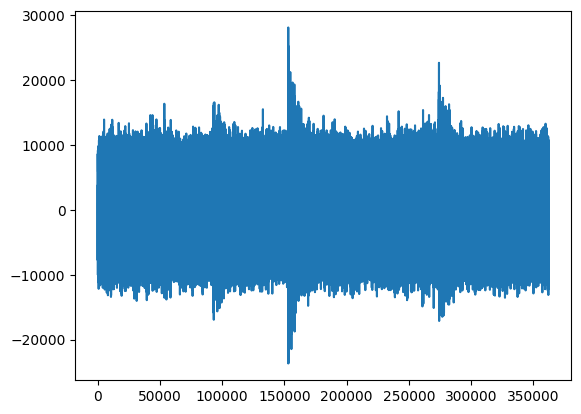

In [16]:
plt.plot(audio)

In [17]:
from IPython.display import Audio
Audio(audio, rate=fs_audio)

Text(0.5, 0, 'Frequência (Hz)')

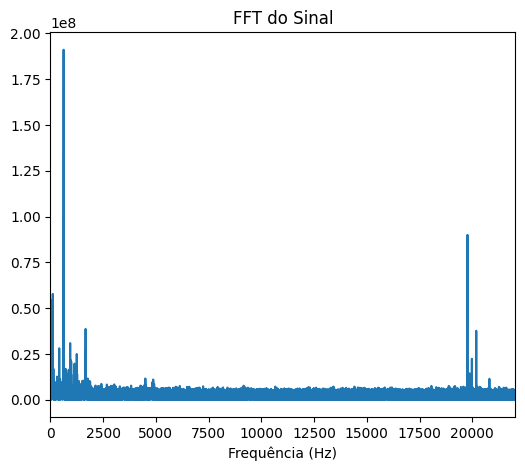

In [18]:
sinal_fft = np.fft.fft(audio)
sinal_fft = abs(sinal_fft)
freq_audio = np.arange(0,fs_audio,fs_audio/sinal_fft.shape[0])

plt.figure(figsize=(6,5))
plt.plot(freq_audio,sinal_fft)
plt.xlim(0,22050)
plt.title('FFT do Sinal')
plt.xlabel('Frequência (Hz)')

Text(0.5, 0, 'Sample')

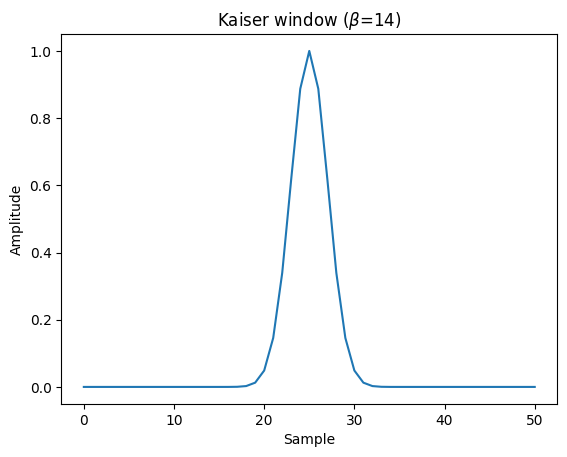

In [22]:
window = signal.windows.kaiser(51, beta=150)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=14)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

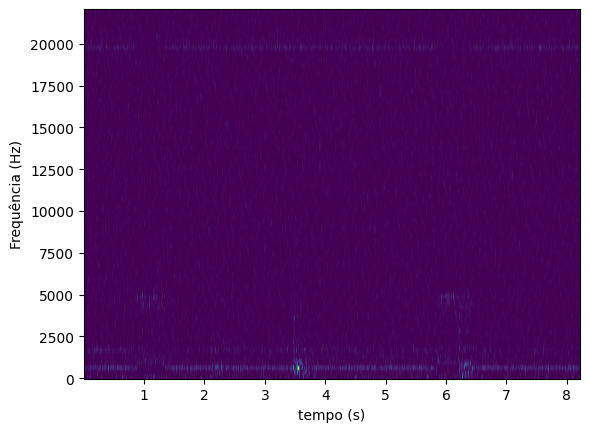

In [21]:
[fs_audio,audio]=wavfile.read("falhas_intermitentes_e_impulsos.wav")
audio = audio.astype(np.float32)

window = signal.windows.kaiser(int(fs_audio/50), beta=100, sym=True)
freq,tempo,p = signal.spectrogram(audio,fs_audio, window)

plt.pcolormesh(tempo,freq,p)
plt.xlabel('tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.show()

Audio(audio, rate=fs_audio)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving motor_falha.wav to motor_falha.wav


In [ ]:
[fs_audio,audio]=wavfile.read('motor_falha.wav')
audio = audio.astype(np.float32)

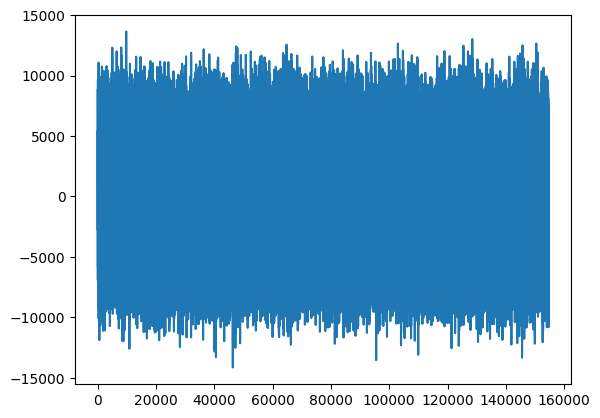

In [ ]:
plt.plot(audio)

In [ ]:
from IPython.display import Audio
Audio(audio, rate=fs_audio)

Eventos de Impulsos: